In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from scipy.optimize import fmin_bfgs

%config InlineBackend.figure_format = 'retina'
#%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
print("Setup Complete")

Setup Complete


In [9]:
f = open("AndrewNg/ex2data1.txt")
df = pd.read_csv(f,names=["Score_Ex1","Score_Ex2","isAdmitted"])
df.head()

,Score_Ex1,Score_Ex2,isAdmitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


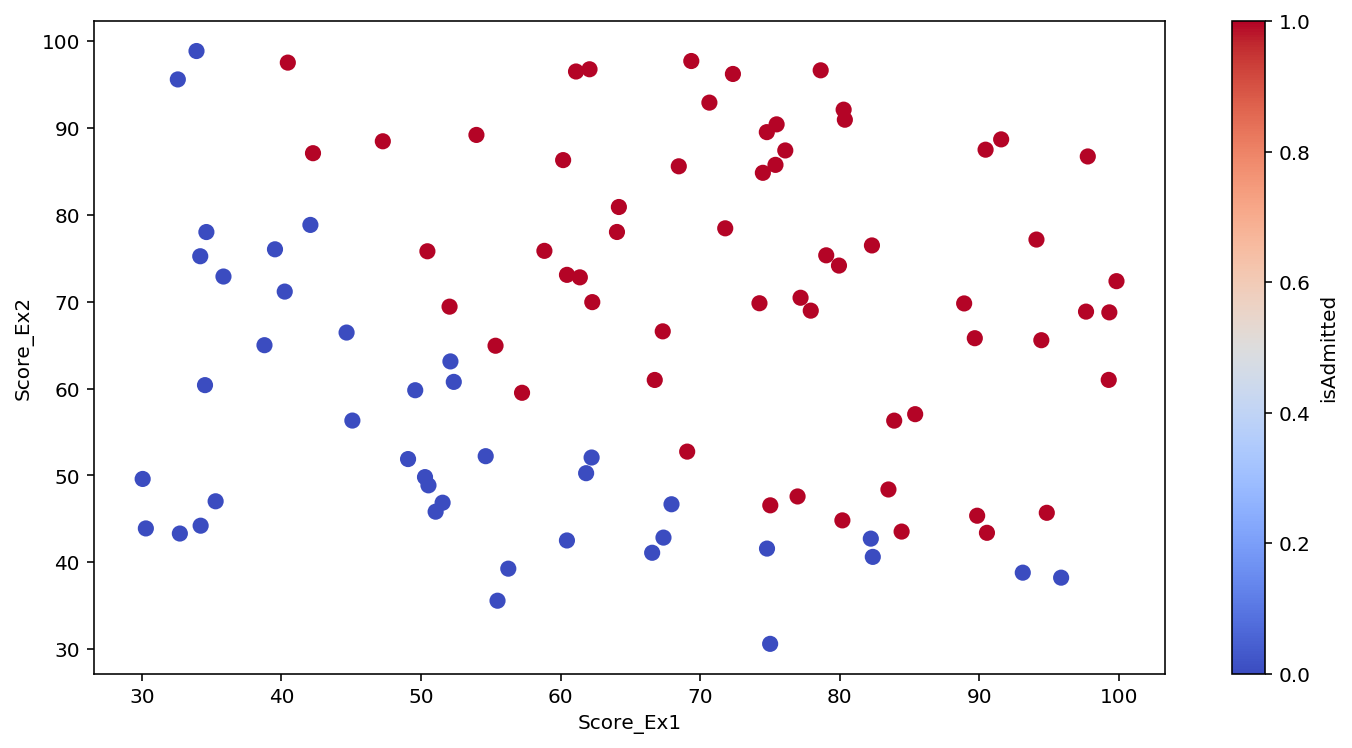

In [277]:
fg, ax_scatter = plt.subplots()
ax_scatter = df.plot(x="Score_Ex1",y="Score_Ex2",c="isAdmitted",kind='scatter',colormap="coolwarm",s=50,ax=ax_scatter)
plt.show()

In [46]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [215]:
def CstFun(theta,m,x,y):
    h = sigmoid(np.dot(x,np.transpose(theta)))
    J = 1/m*(-np.dot(y,np.log(h))-np.dot((1-y),np.log(1-h)))
    return J.item()
def Norm(x):
    return (x-x.mean())/x.std()

In [230]:
theta = np.zeros((1,3))
m = len(df.iloc[:,0])
X = np.ones((m,1))
df.iloc[:,0].values.reshape(m,1)
for i in range(len(df.iloc[0])-1):
    X = np.append(X,df.iloc[:,i].values.reshape(m,1),axis=1)
Y = df["isAdmitted"].values.reshape(1,m)
X_Norm = Norm(X)
#CstFun(theta,m,X_Norm,Y_Norm)

In [240]:
guess = np.array([0.5,1,1])
minT = fmin_bfgs(CstFun,guess,args=(m,X_Norm,Y))
print(minT)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 19
         Function evaluations: 105
         Gradient evaluations: 21
[5.62826383 7.07224781 6.90890558]


In [293]:
print("J value from " + str(CstFun(theta,m,X_Norm,Y)) + " to " + str(CstFun(minT,m,X_Norm,Y)))

J value from 0.6931471805599452 to 0.20349770216932697


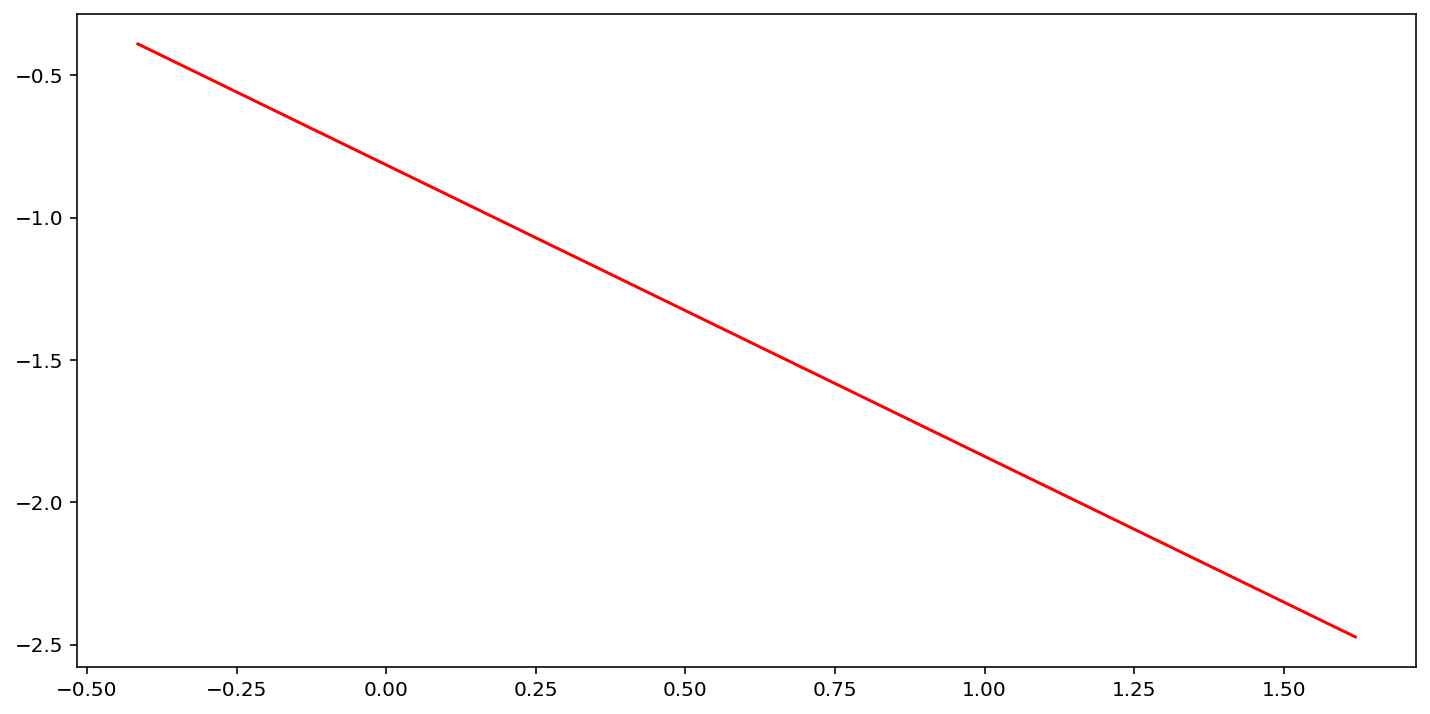

In [288]:
#Some decision boundary formula...
x1 = np.array([min(X_Norm[:,1]),max(X_Norm[:,1])])
x2 = -(minT[0]+minT[1]*x1)/minT[2]
ax_db = plt.plot(x1,x2,"r")
#ax_scatter.add_line(ax_db)
#plt.show()